In [ ]:
#mounting the drive and redirecting to folder

cd '/content/drive/MyDrive/nlp_da1'

/content/drive/MyDrive/nlp_da1


# Dataset gathering from wikimedia dumps

---

Here we gather dataset from the given link and unzip the folder and extract the files. I am using **'wikiextractor'** library to do the necessary commands.

In [ ]:

!wget http://dumps.wikimedia.org/tawiki/latest/tawiki-latest-pages-articles.xml.bz2

--2021-09-06 03:39:22--  http://dumps.wikimedia.org/tawiki/latest/tawiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dumps.wikimedia.org/tawiki/latest/tawiki-latest-pages-articles.xml.bz2 [following]
--2021-09-06 03:39:23--  https://dumps.wikimedia.org/tawiki/latest/tawiki-latest-pages-articles.xml.bz2
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179947151 (172M) [application/octet-stream]
Saving to: ‘tawiki-latest-pages-articles.xml.bz2.1’

tawiki-latest-pages 100%[===================>] 171.61M  4.68MB/s    in 38s     

2021-09-06 03:40:01 (4.57 MB/s) - ‘tawiki-latest-pages-articles.xml.bz2.1’ saved [179947151/179947151]



In [ ]:
!bunzip2 tawiki-latest-pages-articles.xml.bz2

In [ ]:
!ls -ltr

total 1717423
-rw------- 1 root root 1448750976 Sep  1 17:23 tawiki-latest-pages-articles.xml
-rw------- 1 root root    7054336 Sep  5 14:11 tawikibooks.zip
-rw------- 1 root root  302735000 Sep  6 03:41 tawiki-latest-pages-articles.xml.bz2.1.out
-rw------- 1 root root      99360 Sep  6 03:43 Untitled7.ipynb


In [ ]:
!git clone https://github.com/attardi/wikiextractor.git

Cloning into 'wikiextractor'...
remote: Enumerating objects: 742, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 742 (delta 0), reused 0 (delta 0), pack-reused 741
Receiving objects: 100% (742/742), 1.28 MiB | 4.40 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [ ]:
!ls

tawikibooks.zip				    Untitled7.ipynb
tawiki-latest-pages-articles.xml	    wikiextractor
tawiki-latest-pages-articles.xml.bz2.1.out


In [ ]:
!python ./wikiextractor/wikiextractor/WikiExtractor.py tawiki-latest-pages-articles.xml --no-templates -q

## Getting List of article collection files

---



In [ ]:
import glob
flist=glob.glob('text/*/*')

In [ ]:
len(flist)

559

In [ ]:
flist[:2]

['text/AA/wiki_00', 'text/AA/wiki_01']

In [ ]:
def future_name(fn):
  a,b,c=fn.split('/')
  return '/'.join([a,b,b+'_'+c+'.txt'])
future_name(flist[0])

'text/AA/AA_wiki_00.txt'

In [ ]:
import os
for f in flist:
  os.rename(f,future_name(f))

In [ ]:
flist2=glob.glob('text/*/*')
len(flist2),flist2[:2]

(559, ['text/AA/AA_wiki_00.txt', 'text/AA/AA_wiki_01.txt'])

In [ ]:
with open(flist2[0], encoding='utf-8') as f:
    text=f.read()
print(text[:1000])

<doc id="3" url="https://ta.wikipedia.org/wiki?curid=3" title="முதற் பக்கம்">
முதற் பக்கம்

&lt;templatestyles src="Main Page/minerva.css" /&gt;

</doc>
<doc id="12" url="https://ta.wikipedia.org/wiki?curid=12" title="கட்டிடக்கலை">
கட்டிடக்கலை

கட்டிடக்கலை என்பது கட்டிடங்கள் மற்றும் அதன் உடல் கட்டமைப்புகளை வடிவமைத்தல், செயல்முறைத் திட்டமிடல், மற்றும் கட்டிடங்கள் கட்டுவதை உள்ளடக்கியதாகும். கட்டடக்கலை படைப்புகள், கட்டிடங்கள் பொருள் வடிவம், பெரும்பாலும் கலாச்சார சின்னங்களாக மற்றும் கலை படைப்புகளாக காணப்படுகின்றது. வரலாற்று நாகரிகங்கள் பெரும்பாலும் அவர்களின் கட்டிடகலை சாதனைகளின் மூலம் அடையாளம் காணப்படுகின்றன.
ஒரு விரிவான வரைவிலக்கணம், பெருமட்டத்தில், நகரத் திட்டமிடல், நகர்ப்புற வடிவமைப்பு மற்றும் நிலத்தோற்றம் முதலியவற்றையும், நுண்மட்டத்தில், தளபாடங்கள், உற்பத்திப்பொருள் முதலியவற்றை உள்ளடக்கிய, முழு உருவாக்கச் சூழலின் வடிவமைப்பைக் கட்டிடக்கலைக்குள் அடக்கும். 
மேற்படி விடயத்தில், தற்போது கிடைக்கும் மிகப் பழைய ஆக்கம், கி.பி. முதலாம் நூற்றாண்டைச் சேர்ந்த உரோமானியக் கட்டடக் கலைஞரான விட்ருவியஸ் 

## Extract titles of articles

In [ ]:
import re

example_title ='<doc id="12" url="https://ta.wikipedia.org/wiki?curid=12" title="கட்டிடக்கலை">'
pattern = 'title="(.*?)">'
with open(flist2[0], encoding='utf-8') as f:
    text=f.read()
    titles=re.findall(pattern, text)
    print(len(titles), 'articles found')

84 articles found


#Total number of all articles

In [ ]:
pattern = 'title="(.*?)">'
def get_article_count(fname):
    with open(fname, encoding='utf-8') as f:
        text=f.read()
        titles=re.findall(pattern, text)
        return len(titles)
print(sum([get_article_count(f) for f in flist2]))

185250


#Create tiny subset for analyses

In [ ]:
!mv text tawiki_large

In [ ]:
flist3 = glob.glob('tawiki_large/*/*')
flist3[0], len(flist3)

('tawiki_large/AA/AA_wiki_00.txt', 559)

In [ ]:
import random
random.shuffle(flist3)
flist3[:2]

['tawiki_large/AE/AE_wiki_94.txt', 'tawiki_large/AB/AB_wiki_05.txt']

In [ ]:
flist_small = flist3[:40]

In [ ]:
!mkdir tawiki_small

In [ ]:
for file in flist_small:
    with open(file, encoding='utf-8') as f:
        text = f.read()
        name=file.split('/')
        newname=name[0].replace('large', 'small')+'/'+name[2]
    with open(newname, "w") as text_file:
        text_file.write(text)

In [ ]:

pattern = 'title="(.*?)">'
def get_article_count(fname):
    with open(fname, encoding='utf-8') as f:
        text=f.read()
        titles=re.findall(pattern, text)
        return len(titles)
    
flist_small = glob.glob('tawiki_small/*')
print(sum([get_article_count(f) for f in flist_small]))

13597


## Dataset Preprocessing and Tokenization of tamil words for selected text file

---



In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams

# this corpus is pretty big, so let's look at just one of the files in it
with open("/content/drive/MyDrive/nlp_da1/tawiki_large/AA/AA_wiki_00.txt", "r") as file:
    text = file.read()

# check to make sure the file read in alright; let's print out the first 1000 characters
text[0:1000]

'<doc id="3" url="https://ta.wikipedia.org/wiki?curid=3" title="முதற் பக்கம்">\nமுதற் பக்கம்\n\n&lt;templatestyles src="Main Page/minerva.css" /&gt;\n\n</doc>\n<doc id="12" url="https://ta.wikipedia.org/wiki?curid=12" title="கட்டிடக்கலை">\nகட்டிடக்கலை\n\nகட்டிடக்கலை என்பது கட்டிடங்கள் மற்றும் அதன் உடல் கட்டமைப்புகளை வடிவமைத்தல், செயல்முறைத் திட்டமிடல், மற்றும் கட்டிடங்கள் கட்டுவதை உள்ளடக்கியதாகும். கட்டடக்கலை படைப்புகள், கட்டிடங்கள் பொருள் வடிவம், பெரும்பாலும் கலாச்சார சின்னங்களாக மற்றும் கலை படைப்புகளாக காணப்படுகின்றது. வரலாற்று நாகரிகங்கள் பெரும்பாலும் அவர்களின் கட்டிடகலை சாதனைகளின் மூலம் அடையாளம் காணப்படுகின்றன.\nஒரு விரிவான வரைவிலக்கணம், பெருமட்டத்தில், நகரத் திட்டமிடல், நகர்ப்புற வடிவமைப்பு மற்றும் நிலத்தோற்றம் முதலியவற்றையும், நுண்மட்டத்தில், தளபாடங்கள், உற்பத்திப்பொருள் முதலியவற்றை உள்ளடக்கிய, முழு உருவாக்கச் சூழலின் வடிவமைப்பைக் கட்டிடக்கலைக்குள் அடக்கும். \nமேற்படி விடயத்தில், தற்போது கிடைக்கும் மிகப் பழைய ஆக்கம், கி.பி. முதலாம் நூற்றாண்டைச் சேர்ந்த உரோமானியக் கட்டடக் கலைஞரான 

In [ ]:

# get rid of all the XML markup
text = re.sub('<.*>','',text)

# get rid of the "ENDOFARTICLE." text
text = re.sub('ENDOFARTICLE.','',text)

text = re.sub('[a-zA-Z]','',text)

# get rid of punctuation
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
text = re.sub(punctuationNoPeriod, "", text)

# make sure it looks ok
text[0:1000]

'\nமுதற் பக்கம்\n\n   \n\n\n\nகட்டிடக்கலை\n\nகட்டிடக்கலை என்பது கட்டிடங்கள் மற்றும் அதன் உடல் கட்டமைப்புகளை வடிவமைத்தல் செயல்முறைத் திட்டமிடல் மற்றும் கட்டிடங்கள் கட்டுவதை உள்ளடக்கியதாகும் கட்டடக்கலை படைப்புகள் கட்டிடங்கள் பொருள் வடிவம் பெரும்பாலும் கலாச்சார சின்னங்களாக மற்றும் கலை படைப்புகளாக காணப்படுகின்றது வரலாற்று நாகரிகங்கள் பெரும்பாலும் அவர்களின் கட்டிடகலை சாதனைகளின் மூலம் அடையாளம் காணப்படுகின்றன\nஒரு விரிவான வரைவிலக்கணம் பெருமட்டத்தில் நகரத் திட்டமிடல் நகர்ப்புற வடிவமைப்பு மற்றும் நிலத்தோற்றம் முதலியவற்றையும் நுண்மட்டத்தில் தளபாடங்கள் உற்பத்திப்பொருள் முதலியவற்றை உள்ளடக்கிய முழு உருவாக்கச் சூழலின் வடிவமைப்பைக் கட்டிடக்கலைக்குள் அடக்கும் \nமேற்படி விடயத்தில் தற்போது கிடைக்கும் மிகப் பழைய ஆக்கம் கிபி முதலாம் நூற்றாண்டைச் சேர்ந்த உரோமானியக் கட்டடக் கலைஞரான விட்ருவியஸ் என்பாரது கட்டிடக்கலை தொடர்பில் என்ற நூலாகும் இவரது கூற்றுப்படி நல்ல கட்டிடம் அழகு உறுதி பயன்பாடு ஆகியவற்றைக் கொண்டிருக்கவேண்டும் மேற்படி மூன்றும் ஒன்றின்மீதொன்று அளவுமீறி ஆதிக்கம் செலுத்தாமல் தங்களிடையே சமனிலையையும் ஒ

## N-gram analyses (2,3,4)

In [ ]:
# first get individual words
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# and get a list of all the tri-grams
esBigrams2 = ngrams(tokenized, 3)

# and get a list of all the quad-grams
esBigrams3 = ngrams(tokenized, 4)

# If you like, you can uncomment the next like to take a look at 
# the first ten to make sure they look ok. Please note that doing so 
# will consume the generator & will break the next block of code, so you'll
# need to re-comment it and run this block again to get it to work.
#list(esBigrams)[:10]

In [ ]:
# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(20)

[(('ஆம்', 'ஆண்டில்'), 29),
 (('ஐக்கிய', 'நாடுகள்'), 27),
 (('ஆம்', 'ஆண்டு'), 25),
 (('ஐக்கிய', 'அரபு'), 20),
 (('ஆம்', 'நூற்றாண்டில்'), 18),
 (('இந்திய', 'துணைக்'), 18),
 (('என்பது', 'ஒரு'), 13),
 (('சிவாஜி', 'கணேசன்'), 13),
 (('ஆம்', 'நூற்றாண்டின்'), 12),
 (('துணைக்', 'கண்டம்'), 12),
 (('என்ற', 'சொல்'), 12),
 (('19', 'ஆம்'), 11),
 (('மக்கள்', 'தொகை'), 11),
 (('வாஸ்து', 'சாஸ்திரம்'), 10),
 (('ஒரு', 'குறிப்பிட்ட'), 10),
 (('சில', 'சமயங்களில்'), 10),
 (('எம்பயர்', 'ஸ்டேட்'), 10),
 (('கொண்ட', 'ஒரு'), 9),
 (('என்ற', 'பெயர்'), 9),
 (('மிகப்', 'பழைய'), 8)]

In [ ]:
tokenized

['முதற்',
 'பக்கம்',
 'கட்டிடக்கலை',
 'கட்டிடக்கலை',
 'என்பது',
 'கட்டிடங்கள்',
 'மற்றும்',
 'அதன்',
 'உடல்',
 'கட்டமைப்புகளை',
 'வடிவமைத்தல்',
 'செயல்முறைத்',
 'திட்டமிடல்',
 'மற்றும்',
 'கட்டிடங்கள்',
 'கட்டுவதை',
 'உள்ளடக்கியதாகும்',
 'கட்டடக்கலை',
 'படைப்புகள்',
 'கட்டிடங்கள்',
 'பொருள்',
 'வடிவம்',
 'பெரும்பாலும்',
 'கலாச்சார',
 'சின்னங்களாக',
 'மற்றும்',
 'கலை',
 'படைப்புகளாக',
 'காணப்படுகின்றது',
 'வரலாற்று',
 'நாகரிகங்கள்',
 'பெரும்பாலும்',
 'அவர்களின்',
 'கட்டிடகலை',
 'சாதனைகளின்',
 'மூலம்',
 'அடையாளம்',
 'காணப்படுகின்றன',
 'ஒரு',
 'விரிவான',
 'வரைவிலக்கணம்',
 'பெருமட்டத்தில்',
 'நகரத்',
 'திட்டமிடல்',
 'நகர்ப்புற',
 'வடிவமைப்பு',
 'மற்றும்',
 'நிலத்தோற்றம்',
 'முதலியவற்றையும்',
 'நுண்மட்டத்தில்',
 'தளபாடங்கள்',
 'உற்பத்திப்பொருள்',
 'முதலியவற்றை',
 'உள்ளடக்கிய',
 'முழு',
 'உருவாக்கச்',
 'சூழலின்',
 'வடிவமைப்பைக்',
 'கட்டிடக்கலைக்குள்',
 'அடக்கும்',
 'மேற்படி',
 'விடயத்தில்',
 'தற்போது',
 'கிடைக்கும்',
 'மிகப்',
 'பழைய',
 'ஆக்கம்',
 'கிபி',
 'முதலாம்',
 'நூற்றாண்டைச்',
 'சேர்ந

In [ ]:
import pandas as pd
bigrams_series = (pd.Series(nltk.ngrams(tokenized, 2)).value_counts())[:12]
bigrams_series

(ஆம், ஆண்டில்)         29
(ஐக்கிய, நாடுகள்)      27
(ஆம், ஆண்டு)           25
(ஐக்கிய, அரபு)         20
(இந்திய, துணைக்)       18
(ஆம், நூற்றாண்டில்)    18
(என்பது, ஒரு)          13
(சிவாஜி, கணேசன்)       13
(ஆம், நூற்றாண்டின்)    12
(துணைக், கண்டம்)       12
(என்ற, சொல்)           12
(19, ஆம்)              11
dtype: int64

## Plotting of 20 most frequently occuring bigrams

Text(0.5, 0, ' # of Occurances')

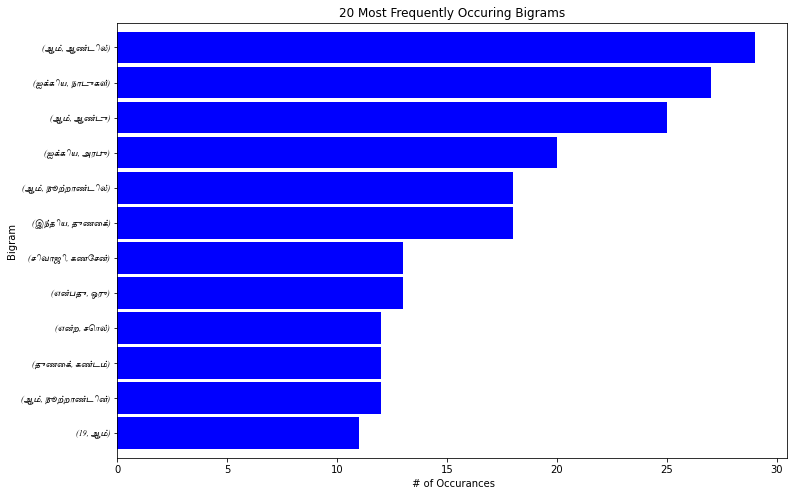

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
from pathlib import Path
import matplotlib.font_manager as fontmanager
nirm = Path('/content/drive/MyDrive/nlp_da1/vijaya.ttf')
tam_font = fontmanager.FontProperties(fname=nirm)
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.yticks(fontproperties=tam_font)
plt.ylabel('Bigram')
plt.xlabel(' # of Occurances')

## plotting of most frequently occuring unigrams

Text(0.5, 0, ' # of Occurances')

<Figure size 2160x1800 with 0 Axes>

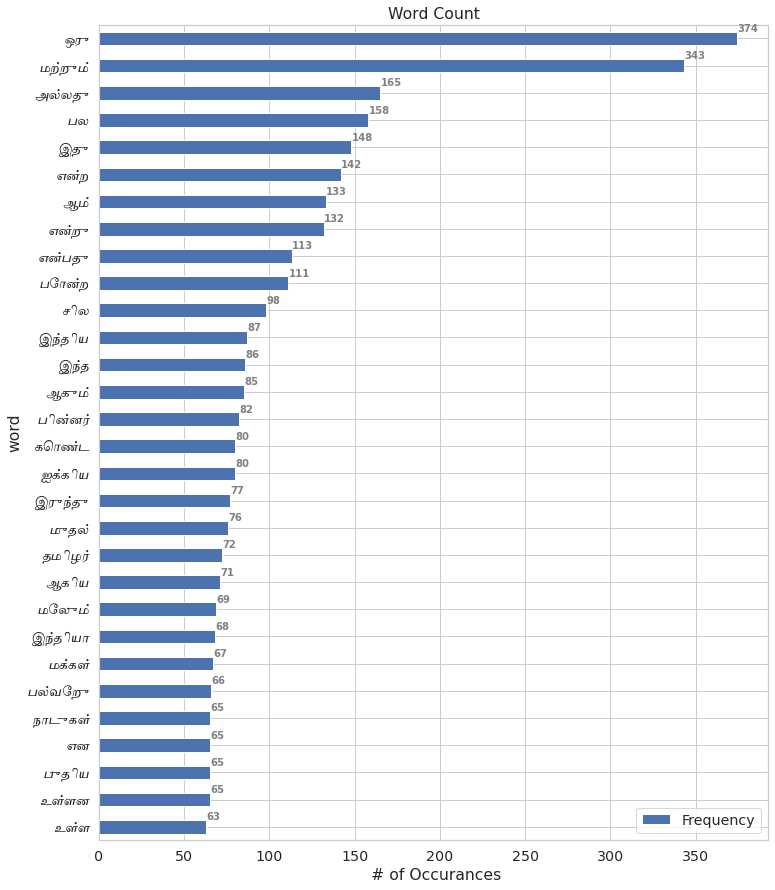

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fontmanager
import matplotlib as mpl
import matplotlib.pyplot as plt
frequency = Counter(tokenized)
df = pd.DataFrame(frequency.most_common(30))
plt.rcParams['figure.figsize'] = [12, 15]
df.columns =['Word', 'Frequency']
df_sorted= df.sort_values('Frequency')
df_sorted.head()
sns.set(font_scale = 1.3, style = 'whitegrid')
nirm = Path('/content/drive/MyDrive/nlp_da1/vijaya.ttf')
tam_font = fontmanager.FontProperties(fname=nirm)

# plotting
fig = plt.figure(figsize=(30, 25))
ax = df_sorted.plot.barh(x='Word', y='Frequency')
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
plt.title('Word Count')
plt.yticks(fontproperties=tam_font)
plt.ylabel('word')
plt.xlabel(' # of Occurances')

## Compiling all text files together for complete analyses


Here we will compile the text files, do tokenization process then save all texts files together in one file

---



In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/nlp_da1/tawiki_small/'):
    for filename in filenames:
        with open('corpus.txt', 'a', encoding='latin-1') as ffile:
            with open(os.path.join(dirname, filename), 'r', encoding='latin-1') as rfile:
                ffile.write(rfile.read())

In [ ]:
def getListWordsPreprocessed(corpus):
    ''' return a corpus after removing all the patterns and the xml markup (if any) '''
    text = corpus.lower()
    text = re.sub('<.*>', '', text)
    text = re.sub('ENDOFARTICLE.', '', text)
    punctuation2remove = "[" + re.sub('[,.;:?!()+/-]', '', string.punctuation) + "]"
    text = re.sub(punctuation2remove, '', text)
    text = re.sub('\n\n+', '\n', text)
    text = re.sub(';+\n', '\n', text)
    text = re.sub('\s*-\s', ' ', text)
    text = re.sub('\s+\.', ' ', text)
    text = re.sub('^\n', '', text, flags=re.MULTILINE)
    text = re.sub('^\s*\w+\s*\n', '', text, flags=re.MULTILINE)
    text = re.sub('\((\s*|\+*|\w\.\s*)\d+(\-*|\s*|,\s*)\d*\-*\)', ' ', text)
    text = re.sub('\(\s*\)', ' ', text)
    text = text.replace(',', '')
    text = text.replace('.', '')
    text = text.replace(';', '')
    text = text.replace(':', '')
    text = text.replace('?', '')
    text = text.replace('!', '')
    text = text.replace('(', '')
    text = text.replace(')', '')
    text = text.replace('/', '')
    text = text.replace('+', '')
    text = text.replace('-', '')
    text = re.sub('\s\d+\s', '', text)
    words = text.split()
    #remove all words with 5 or fewer occurences
    word_cnts = Counter(words)
    trimmed_words = [word for word in words if word_cnts[word] > 5]
    return trimmed_words

## Frequently used tamil word

Here we do process to find the most frequently used tamil words by referring the given dataset

In [ ]:
with open('./corpus.txt', 'r') as f:
    text = f.read()
words = getListWordsPreprocessed(text)
print(words[:50])

['முதற்', 'பக்கம்', 'gt', 'கட்டிடக்கலை', 'கட்டிடக்கலை', 'என்பது', 'கட்டிடங்கள்', 'மற்றும்', 'அதன்', 'உடல்', 'கட்டமைப்புகளை', 'வடிவமைத்தல்', 'செயல்முறைத்', 'திட்டமிடல்', 'மற்றும்', 'கட்டிடங்கள்', 'கட்டுவதை', 'உள்ளடக்கியதாகும்', 'கட்டடக்கலை', 'படைப்புகள்', 'கட்டிடங்கள்', 'பொருள்', 'வடிவம்', 'பெரும்பாலும்', 'கலாச்சார', 'சின்னங்களாக', 'மற்றும்', 'கலை', 'படைப்புகளாக', 'காணப்படுகின்றது', 'வரலாற்று', 'நாகரிகங்கள்', 'பெரும்பாலும்', 'அவர்களின்', 'கட்டிடகலை', 'சாதனைகளின்', 'மூலம்', 'அடையாளம்', 'காணப்படுகின்றன', 'ஒரு', 'விரிவான', 'வரைவிலக்கணம்', 'நகரத்', 'திட்டமிடல்', 'நகர்ப்புற', 'வடிவமைப்பு', 'மற்றும்', 'நிலத்தோற்றம்', 'முதலியவற்றையும்', 'தளபாடங்கள்']


In [ ]:
print("Total amount of words: {}".format(len(words)))
print("Amount of unique words: {}".format(len(set(words))))

Total amount of words: 20176014
Amount of unique words: 240619


In [ ]:
# creating a counter of words ...
vocabulary_counts = Counter(words)
# let's see the 10 most common words
print("10 most commmon words:")
print(vocabulary_counts.most_common(10))

# sorting the words in order of frequency (from most to least frequent)
vocabulary_sorted = sorted(vocabulary_counts, key=vocabulary_counts.get, reverse=True)

# creating the lookup tables
int_to_vocab = {ii: word for ii, word in enumerate(vocabulary_sorted)}
vocab_to_int = {word: ii for ii, word in int_to_vocab.items()}

# create a vocabulary of ints (i..e map the complete vocabulary to its int values)
int_vocabulary = [vocab_to_int[word] for word in words]
print("First 50 int-words of the int vocabulary:")
print(int_vocabulary[:50])

10 most commmon words:
[('மற்றும்', 247361), ('ஒரு', 202780), ('இந்த', 140002), ('இது', 96260), ('என்ற', 91380), ('இவர்', 78561), ('உள்ள', 75862), ('ஆண்டு', 68529), ('என்பது', 65729), ('ஆகும்', 65482)]
First 50 int-words of the int vocabulary:
[5370, 2064, 4502, 1981, 1981, 8, 2318, 0, 39, 354, 16779, 21048, 58960, 4760, 0, 2318, 83769, 11304, 6938, 1516, 2318, 213, 727, 195, 1157, 34293, 0, 368, 56047, 1710, 435, 19856, 195, 382, 187568, 53541, 34, 760, 351, 1, 1784, 10543, 9911, 4760, 4387, 1297, 0, 50132, 42858, 35812]


In [ ]:
frequent= vocabulary_counts.most_common(10)
frequent

[('மற்றும்', 247361),
 ('ஒரு', 202780),
 ('இந்த', 140002),
 ('இது', 96260),
 ('என்ற', 91380),
 ('இவர்', 78561),
 ('உள்ள', 75862),
 ('ஆண்டு', 68529),
 ('என்பது', 65729),
 ('ஆகும்', 65482)]

In [ ]:
freq = pd.DataFrame(frequent)
freq

,0,1
0,மற்றும்,247361
1,ஒரு,202780
2,இந்த,140002
3,இது,96260
4,என்ற,91380
5,இவர்,78561
6,உள்ள,75862
7,ஆண்டு,68529
8,என்பது,65729
9,ஆகும்,65482


## Plotting 10 most freqeuntly used tamil words using barplot 

Text(0.5, 0, ' # of Occurances')

<Figure size 2880x2520 with 0 Axes>

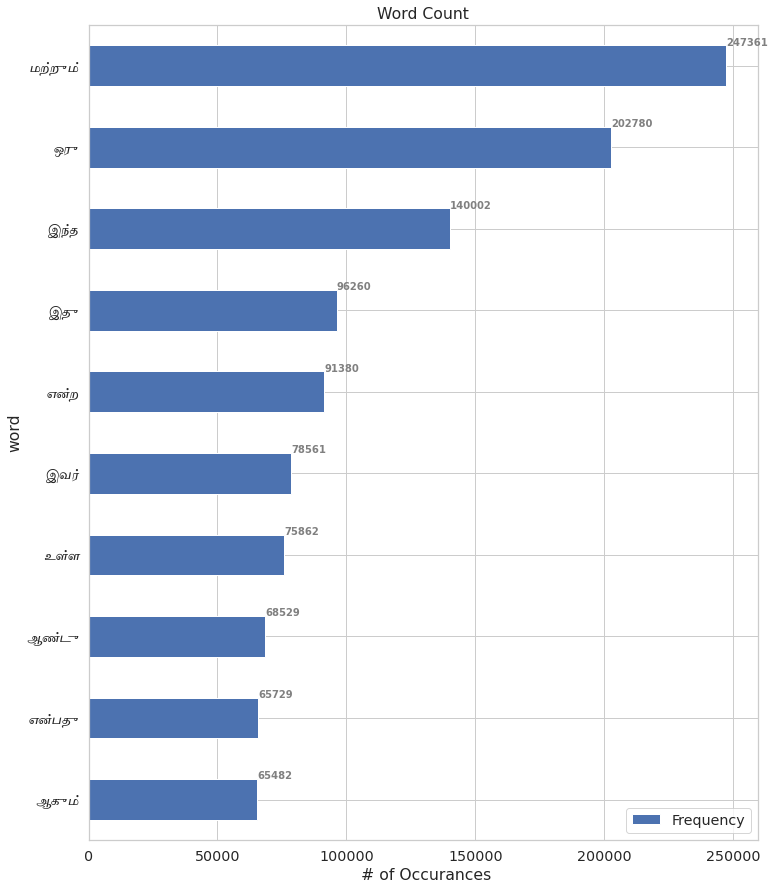

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fontmanager
import matplotlib as mpl
import matplotlib.pyplot as plt
frequency = Counter(tokenized)
df = pd.DataFrame(frequency.most_common(30))
plt.rcParams['figure.figsize'] = [12, 15]
freq.columns =['Word', 'Frequency']
freq_sorted= freq.sort_values('Frequency')
sns.set(font_scale = 1.3, style = 'whitegrid')
nirm = Path('/content/drive/MyDrive/nlp_da1/vijaya.ttf')
tam_font = fontmanager.FontProperties(fname=nirm)

# plotting
fig = plt.figure(figsize=(40, 35))
ax = freq_sorted.plot.barh(x='Word', y='Frequency')
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
plt.title('Word Count')
plt.yticks(fontproperties=tam_font)
plt.ylabel('word')
plt.xlabel(' # of Occurances')

# **THANK YOU!!**

---

